In [143]:
#the Project to predicet the price of used cars from data set taken within Riyadh city. learner regression was used


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [144]:
file_path='carsclean-2.csv'
data_org=pd.read_csv(file_path)

In [145]:
data_org.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,BMW,730,2011,Used,"250,000.0",Automatic,Gasoline,Brown,Cash Only,"75,000.0"
1,Al Riyadh,BMW,730,2012,Used,"200,000.0",Automatic,Gasoline,Brown,Cash Only,"80,000.0"
2,Al Riyadh,BMW,730,2014,Used,"114,999.5",Automatic,Gasoline,Brown,Cash Only,"100,000.0"
3,Al Riyadh,BMW,730,2014,Used,"114,999.5",Automatic,Gasoline,Brown,Cash Only,"100,000.0"
4,Al Riyadh,BMW,730,2014,Used,"114,999.5",Automatic,Gasoline,Brown,Cash Only,"100,000.0"


In [146]:
data_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          560 non-null    object 
 1   car_maker     560 non-null    object 
 2   model         560 non-null    object 
 3   year          560 non-null    int64  
 4   condition     560 non-null    object 
 5   kilometers    560 non-null    float64
 6   transmission  560 non-null    object 
 7   fuel          560 non-null    object 
 8   color         560 non-null    object 
 9   pay_method    560 non-null    object 
 10  price         560 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


In [147]:
#UCY: Better to run after we transform all columns
data_org.describe()

,year,kilometers,price
count,560.0,560.0,560.0
mean,"2,011.9","121,874.8","37,858.1"
std,3.9,"79,423.7","28,085.8"
min,"2,006.0",0.0,"2,114.0"
25%,"2,008.0","45,000.0","16,000.0"
50%,"2,012.5","150,000.0","30,000.0"
75%,"2,015.0","200,000.0","58,375.0"
max,"2,020.0","250,000.0","190,000.0"


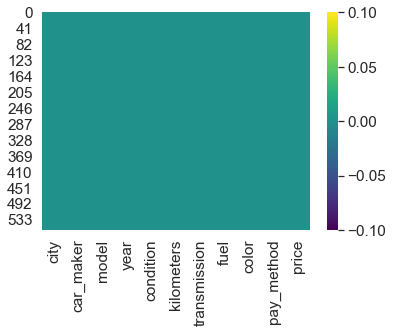

In [148]:
#another way to check null values. No need to do this since we do not have null values
sns.heatmap(data_org.isnull(), cmap='viridis')

In [149]:
# Some functions that can be utilized during analysis

# Iterate through columns, print unique values with counts of each (if very long list, no need to show unique values)
def print_val_counts(data):
    print('VALUES DISTRIBUTION')
    excluded_columns = []
    for col in data.columns:
        uniq_vals = list(data[col].unique())
        length_vals = len(uniq_vals)
        if(length_vals < 15):
            print('\t{0} --> {1}'.format(col, length_vals))
            print(data[col].value_counts())
        else:
            excluded_columns.append(col)
    print("EXCLUDED: {0}".format(excluded_columns))

In [150]:
print_val_counts(data_org)

#All cars from Riyadh, so it should not be included in our model as it does not add value
#Condition = New should be omitted from our training model since we would like to predict only used car prices
#Kilometers = 0 can be kept since the car might be sold right after purchase, but need to mention in EDA
#All cars use gasoline, so it should not be included in our model as it does not add value



VALUES DISTRIBUTION
	city --> 1
Al Riyadh    560
Name: city, dtype: int64
	car_maker --> 11
Toyota      140
Ford        120
BMW          80
Kia          60
Renault      40
Cadillac     20
Nissan       20
GMC          20
Mazda        20
Dodge        20
Suzuki       20
Name: car_maker, dtype: int64
	condition --> 2
Used    540
New      20
Name: condition, dtype: int64
	transmission --> 2
Automatic    500
Manual        60
Name: transmission, dtype: int64
	fuel --> 1
Gasoline    560
Name: fuel, dtype: int64
	color --> 9
White     223
Black     100
Grey       78
Silver     76
Green      41
Beige      20
Brown      18
red         2
Red         2
Name: color, dtype: int64
	pay_method --> 3
Cash Only               460
Cash or Installments     60
Installments Only        40
Name: pay_method, dtype: int64
EXCLUDED: ['model', 'year', 'kilometers', 'price']


In [151]:
# Ecplanatory Data Analysis 

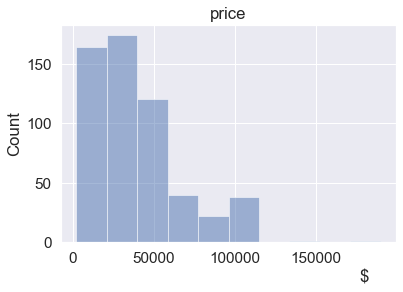

In [152]:
# Price analysis
data_proc = data_org.copy()
pd.options.display.float_format = '{:,.1f}'.format
data_proc[['price']].hist(alpha=0.5,bins=10)
plt.ylabel('Count')
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel('$', x=0.92, ha='right')
plt.show()
#Not much of data for luxury cars; whereas more data for economy class

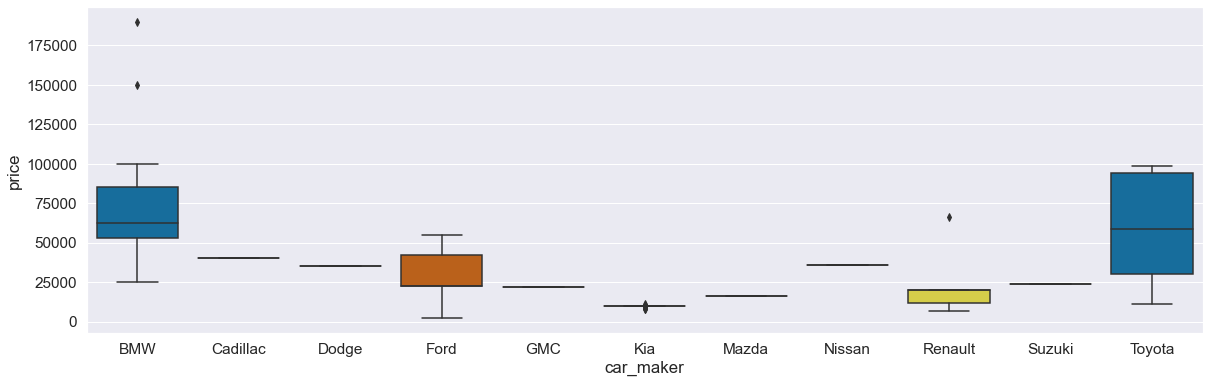

In [153]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,6))
sns.boxplot(y='price', x='car_maker', 
                 data=data_org, 
                 palette="colorblind")
#UCY: Toyota has the widest range of prices; whereas BMW is the highest segment in general
#UCY: Need to check a sample from other car_makers where we have a single value (mean) rather than a range 

In [154]:
data_org[data_org['car_maker']=='Kia']
#UCY: Does not add value to our model, even can create confusion. So, need to remove it

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
260,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
261,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
262,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
263,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
264,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"11,000.0"
265,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
266,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
267,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
268,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"
269,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,"10,000.0"


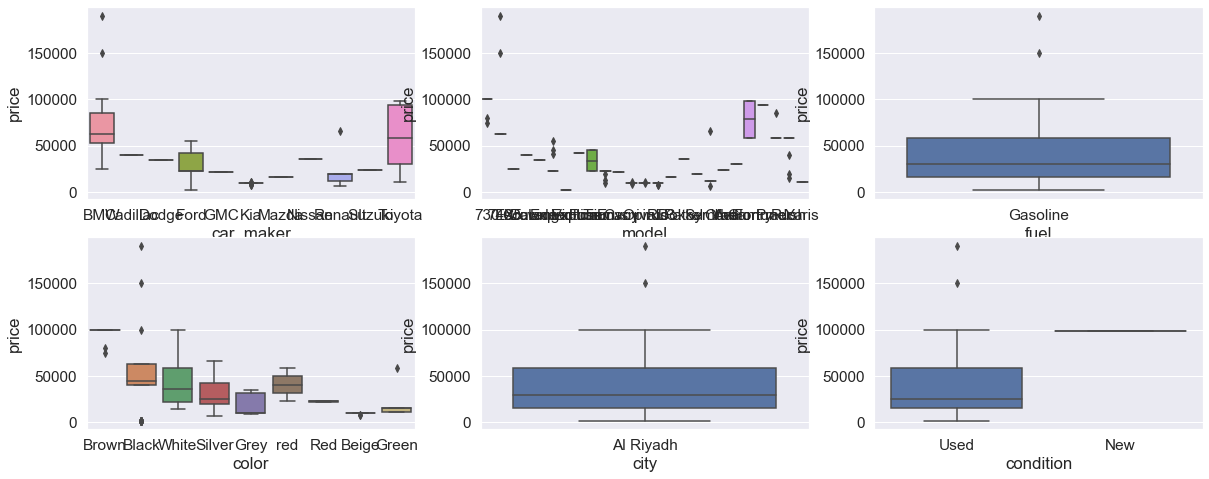

In [155]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'car_maker', y = 'price', data = data_org)
plt.subplot(3,3,2)
sns.boxplot(x = 'model', y = 'price', data = data_org)
plt.subplot(3,3,3)
sns.boxplot(x = 'fuel', y = 'price', data = data_org)
plt.subplot(3,3,4)
sns.boxplot(x = 'color', y = 'price', data = data_org)
plt.subplot(3,3,5)
sns.boxplot(x = 'city', y = 'price', data = data_org)
plt.subplot(3,3,6)
sns.boxplot(x = 'condition', y = 'price', data = data_org)

In [156]:
# Will create a function to identify single price car_maker ads and remove them
#data_org.groupby('car_maker')['price'].unique()
data_org[data_org.groupby('car_maker').price.transform('nunique') == 1]
#we will remove the rows with a car maker that has a single price value during feat. eng.

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
80,Al Riyadh,Cadillac,Escalade,2008,Used,"174,999.5",Automatic,Gasoline,Black,Cash or Installments,"40,000.0"
81,Al Riyadh,Cadillac,Escalade,2008,Used,"174,999.5",Automatic,Gasoline,Black,Cash or Installments,"40,000.0"
82,Al Riyadh,Cadillac,Escalade,2008,Used,"174,999.5",Automatic,Gasoline,Black,Cash or Installments,"40,000.0"
83,Al Riyadh,Cadillac,Escalade,2008,Used,"174,999.5",Automatic,Gasoline,Black,Cash or Installments,"40,000.0"
84,Al Riyadh,Cadillac,Escalade,2008,Used,"174,999.5",Automatic,Gasoline,Black,Cash or Installments,"40,000.0"
...,...,...,...,...,...,...,...,...,...,...,...
415,Al Riyadh,Suzuki,Other,2013,Used,"14,999.5",Manual,Gasoline,White,Cash Only,"24,000.0"
416,Al Riyadh,Suzuki,Other,2013,Used,"14,999.5",Manual,Gasoline,White,Cash Only,"24,000.0"
417,Al Riyadh,Suzuki,Other,2013,Used,"14,999.5",Manual,Gasoline,White,Cash Only,"24,000.0"
418,Al Riyadh,Suzuki,Other,2013,Used,"14,999.5",Manual,Gasoline,White,Cash Only,"24,000.0"


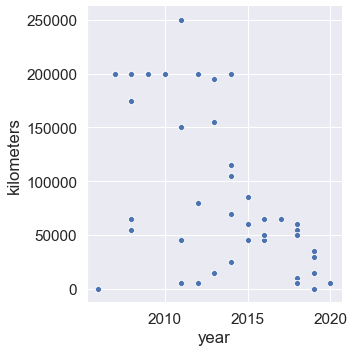

In [157]:
sns.relplot(x="year",y="kilometers", data=data_org)

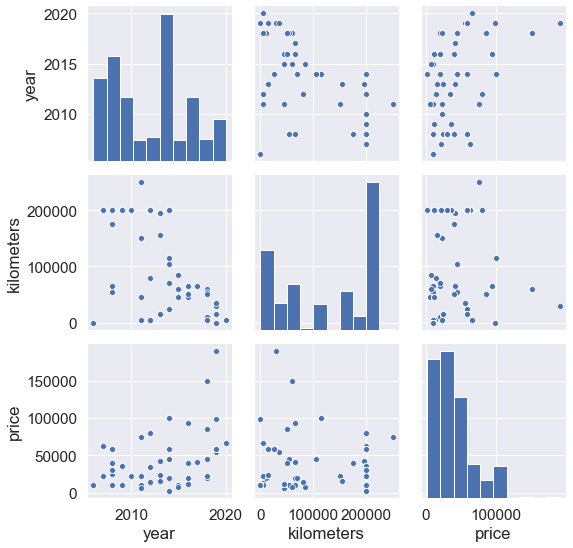

In [158]:
sns.pairplot(data_org)

In [159]:
# keep the original df as it is and create a copy for processing
data_proc = data_org.copy()

In [160]:
# Better to have a look at New cars before eliminating the rows
data_proc[data_proc['condition']=='New']
#It can be seen that they are all same type - maybe a seller is trying to get rid of excessed Toyota Camry he has through this channel

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
441,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
443,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
445,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
447,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
449,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
451,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
453,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
455,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
457,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"
459,Al Riyadh,Toyota,Camry,2019,New,0.0,Automatic,Gasoline,White,Cash or Installments,"98,500.0"


In [161]:
#Removing data with condition = new
data_proc = data_proc[data_proc['condition']!='New']

In [162]:
data_proc = data_proc[data_proc.groupby('car_maker').price.transform('nunique') > 1]

In [163]:
#Clean up columns that have no impact in the training (only a single value in the column)
data_proc.drop(columns = data_proc.columns[data_proc.nunique() == 1],
    inplace = True)
data_proc.head()

,car_maker,model,year,kilometers,transmission,color,pay_method,price
0,BMW,730,2011,"250,000.0",Automatic,Brown,Cash Only,"75,000.0"
1,BMW,730,2012,"200,000.0",Automatic,Brown,Cash Only,"80,000.0"
2,BMW,730,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0"
3,BMW,730,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0"
4,BMW,730,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0"


In [164]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_maker     420 non-null    object 
 1   model         420 non-null    object 
 2   year          420 non-null    int64  
 3   kilometers    420 non-null    float64
 4   transmission  420 non-null    object 
 5   color         420 non-null    object 
 6   pay_method    420 non-null    object 
 7   price         420 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 29.5+ KB


In [165]:
# Feature Engineering cont. with transformation of values
# We need to convert strings to numbers
# We need to get rid of illogical values
# Will do it column by column
# We can do some additional analysis and create graphs during this process

In [166]:
data_proc['car_maker_model']=data_proc["car_maker"]+'-'+data_proc["model"]
data_proc.head()

,car_maker,model,year,kilometers,transmission,color,pay_method,price,car_maker_model
0,BMW,730,2011,"250,000.0",Automatic,Brown,Cash Only,"75,000.0",BMW-730
1,BMW,730,2012,"200,000.0",Automatic,Brown,Cash Only,"80,000.0",BMW-730
2,BMW,730,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0",BMW-730
3,BMW,730,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0",BMW-730
4,BMW,730,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0",BMW-730


In [167]:
# Transform car_maker and model
# Use dummy variables to convert categorical values into boolean
data_proc['car_maker_model']=data_proc["car_maker"]+'-'+data_proc["model"]
car_maker_model_dummy = pd.get_dummies(data_proc["car_maker_model"], prefix="maker_model")
data_proc = pd.concat([data_proc, car_maker_model_dummy], axis=1)
#UCY: No need for these categorical columns any more
data_proc.drop(columns = ['car_maker'], inplace = True)
data_proc.drop(columns = ['model'], inplace = True)
data_proc.drop(columns = ['car_maker_model'], inplace = True)
data_proc.head()

,year,kilometers,transmission,color,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,...,maker_model_Kia-Opirus,maker_model_Kia-Rio,maker_model_Renault-Dokker Van,maker_model_Renault-Symbol,maker_model_Toyota-Avalon,maker_model_Toyota-Camry,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris
0,2011,"250,000.0",Automatic,Brown,Cash Only,"75,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,"200,000.0",Automatic,Brown,Cash Only,"80,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,"114,999.5",Automatic,Brown,Cash Only,"100,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# Transform transmission
# using label encoder for assigning a float instead of categorical 

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

data_proc['transmission'] = labelencoder.fit_transform(data_proc['transmission'].astype(str))
data_proc.head()

,year,kilometers,transmission,color,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,...,maker_model_Kia-Opirus,maker_model_Kia-Rio,maker_model_Renault-Dokker Van,maker_model_Renault-Symbol,maker_model_Toyota-Avalon,maker_model_Toyota-Camry,maker_model_Toyota-Fortuner,maker_model_Toyota-Prado,maker_model_Toyota-Rush,maker_model_Toyota-Yaris
0,2011,"250,000.0",0,Brown,Cash Only,"75,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012,"200,000.0",0,Brown,Cash Only,"80,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,"114,999.5",0,Brown,Cash Only,"100,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,"114,999.5",0,Brown,Cash Only,"100,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,"114,999.5",0,Brown,Cash Only,"100,000.0",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Transform color
# Use dummy variables to convert categorical values into boolean
color_dummy = pd.get_dummies(data_proc["color"], prefix="color")
data_proc = pd.concat([data_proc, color_dummy], axis=1)
#UCY: No need for these categorical columns any more
data_proc.drop(columns = ['color'], inplace = True)
data_proc.head()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Yaris,color_Beige,color_Black,color_Brown,color_Green,color_Grey,color_Red,color_Silver,color_White,color_red
0,2011,"250,000.0",0,Cash Only,"75,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2012,"200,000.0",0,Cash Only,"80,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2014,"114,999.5",0,Cash Only,"100,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2014,"114,999.5",0,Cash Only,"100,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,"114,999.5",0,Cash Only,"100,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [170]:
# Transform transmission
# We are going to use label encoder for assigning a float instead of categorical 
data_proc['pay_method'] = labelencoder.fit_transform(data_proc['pay_method'].astype(str))
data_proc.head()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Yaris,color_Beige,color_Black,color_Brown,color_Green,color_Grey,color_Red,color_Silver,color_White,color_red
0,2011,"250,000.0",0,0,"75,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2012,"200,000.0",0,0,"80,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2014,"114,999.5",0,0,"100,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2014,"114,999.5",0,0,"100,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,"114,999.5",0,0,"100,000.0",1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [171]:
data_proc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 559
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             420 non-null    int64  
 1   kilometers                       420 non-null    float64
 2   transmission                     420 non-null    int32  
 3   pay_method                       420 non-null    int32  
 4   price                            420 non-null    float64
 5   maker_model_BMW-730              420 non-null    uint8  
 6   maker_model_BMW-740              420 non-null    uint8  
 7   maker_model_BMW-X5               420 non-null    uint8  
 8   maker_model_Ford-Crown Victoria  420 non-null    uint8  
 9   maker_model_Ford-Expedition      420 non-null    uint8  
 10  maker_model_Ford-Explorer        420 non-null    uint8  
 11  maker_model_Ford-Fusion          420 non-null    uint8  
 12  maker_model_Ford-Tauru

In [172]:
# See the correlation bw variables
import seaborn as sns; 
import matplotlib.pyplot as plt

def get_correlations_heatmap(data, size=(25,12)):
    correlations = np.around(data.corr(), decimals=2)
    mask = np.zeros_like(correlations, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=size)
    sns.set(font_scale=1.4)
    sns.heatmap(correlations,
                vmin=-1,
                cmap='coolwarm',
                annot=True,
                mask = mask);
    #plt.xticks(rotation=60)
    plt.show()
    


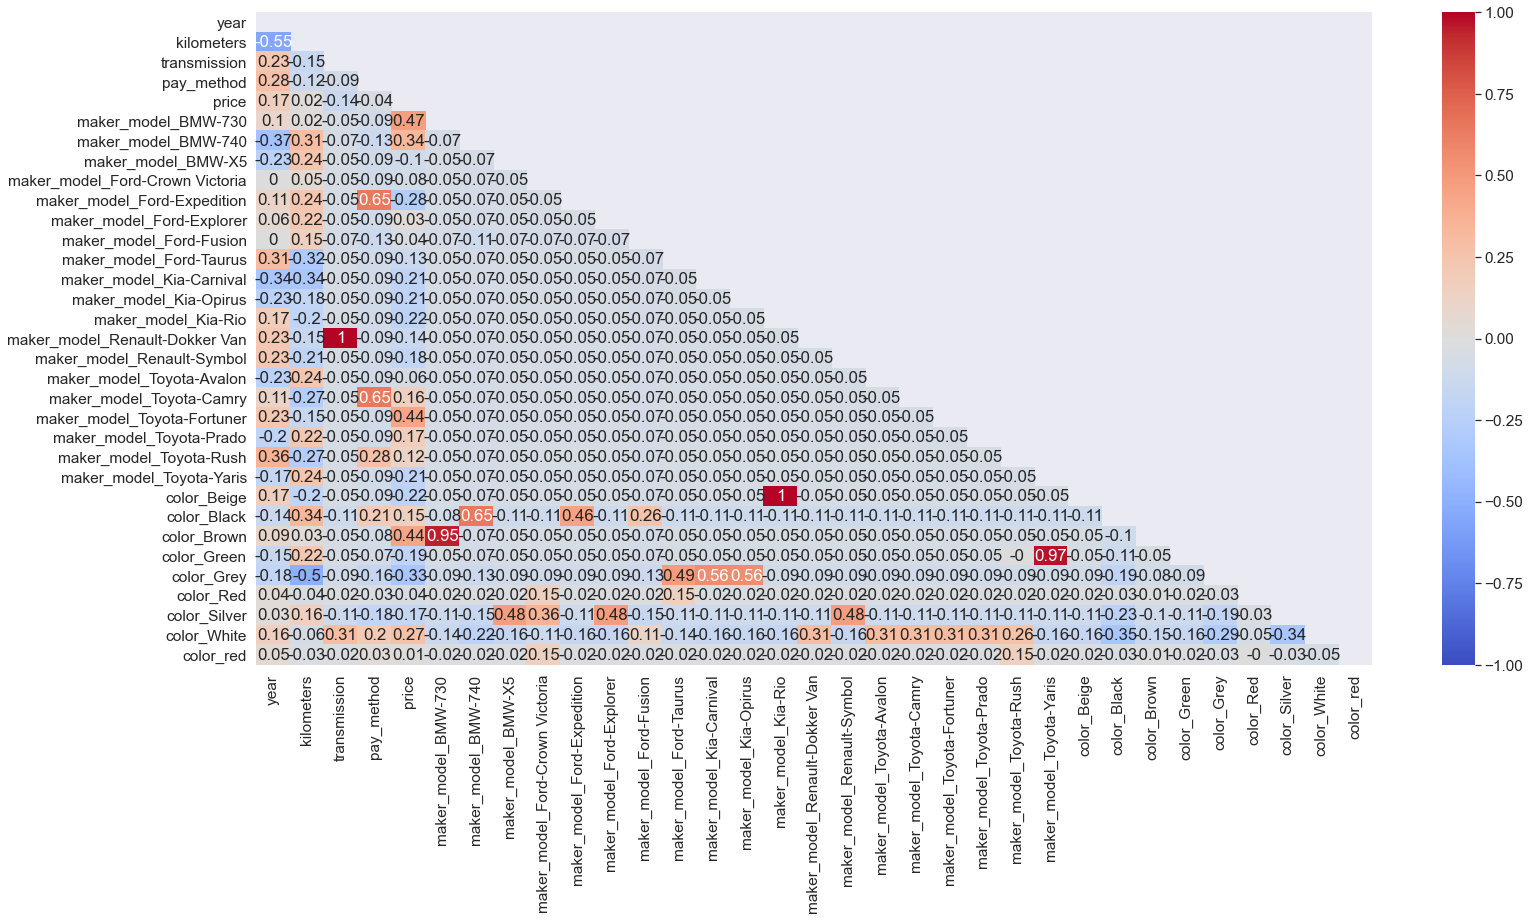

In [173]:
get_correlations_heatmap(data_proc)
# Some key takeaways
# kilometers is strongly negative correlated with year --> older cars usually have higher km
# some models have only a single color, so the color for that car model is fixed (cor = 1)
# need to check price's correlation with other features

In [174]:
data_proc.describe()

,year,kilometers,transmission,pay_method,price,maker_model_BMW-730,maker_model_BMW-740,maker_model_BMW-X5,maker_model_Ford-Crown Victoria,maker_model_Ford-Expedition,...,maker_model_Toyota-Yaris,color_Beige,color_Black,color_Brown,color_Green,color_Grey,color_Red,color_Silver,color_White,color_red
count,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,...,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0,420.0
mean,"2,012.0","117,499.8",0.0,0.2,"37,548.9",0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.2,0.3,0.0
std,3.9,"77,982.9",0.2,0.6,"28,844.3",0.2,0.3,0.2,0.2,0.2,...,0.2,0.2,0.4,0.2,0.2,0.3,0.1,0.4,0.5,0.1
min,"2,006.0",0.0,0.0,0.0,"2,114.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"2,008.0","45,000.0",0.0,0.0,"12,000.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,"2,013.0","114,999.5",0.0,0.0,"25,000.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,"2,015.0","200,000.0",0.0,0.0,"58,375.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,"2,020.0","250,000.0",1.0,2.0,"190,000.0",1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
sns.pairplot(data_proc)

In [ ]:
# Start Developing the Model
# Will try different algorithms and pick the most accurate one (leaner Regression as of now)
#Libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

In [ ]:
# Prepare train and test data
# will use 30% of data for testing
# initially taking all reamining columns in our model (can remove some columns for some algorithms later on)
y=data_proc.price
x=data_proc.loc[:, data_proc.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train = X_train
x_test = X_test 
print(len(y_train), len(y_test))

In [ ]:
# Start with Linear Regression
# Bulid a new Model
regression = LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

# Predict for training set
y_train_predict = regression.predict(X_train)

# Predict for training set
y_test_predict = regression.predict(X_test)

In [ ]:
# Evaluation of the model

# model evaluation for training set
mse_train = mean_squared_error(y_train, y_train_predict)
mae_train = mean_absolute_error(y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(np.sqrt(mse_train)))
print('MAE is {}'.format(mae_train))
print("---------------------------------------")

# model evaluation for testing set
mse_test = mean_squared_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
mae_test = mean_absolute_error(y_test, y_test_predict) # Return the loss it is non-negative . The best value is 0.0
print("The model performance for testing set")
print('RMSE is {}'.format(np.sqrt(mse_test)))
print('MAE is {}'.format(mae_test))

print("---------------------------------------")
test_score= regression.score(X_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

In [ ]:
compare={"Actual": y_test, "Predict": y_test_predict}
pd.DataFrame(compare)

In [ ]:
# visualization
idx= np.random.choice(X_test.shape[0])
print(idx)
plt.scatter(y_test, y_test_predict,  color='black')
plt.xlabel('Actual price')
plt.ylabel('Predicted pric')
plt.plot([data_proc['price'].min(), data_proc['price'].max()], [data_proc['price'].min(), data_proc['price'].max()], color='red')
plt.show()
# Data is overfitting

In [ ]:
# Save the model

import pickle
filename='linear_model.pkl'
pickle.dump(regression, open(filename, 'wb')) # w = write b ==binary mode

In [ ]:
# Load the saved model
model_load = pickle.load(open(filename, 'rb')) # r = read b ==binary mode
model_load.coef_

In [ ]:
# y-intercept b0  {𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4+b0}
model_load.intercept_

In [ ]:
data_proc.columns

In [ ]:
data_proc.head()

In [ ]:
print_val_counts(data_proc)

In [ ]:
print_val_counts(data_org)

In [ ]:
data_proc.columns

In [ ]:
# use the saved model for prediction
import os

# Recall the features are ['bedrooms', 'bathrooms','sqft_living', 'grade']

inputs = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#[2019, 14999.5,0,1]
year = input('''Enter the year (4 digits)
                            RESPONSE: ''')
inputs[0] = np.int64(year)
kilometers = input('''Enter the kilometers (floating number)
                            RESPONSE: ''')
inputs[1] = float(kilometers)
transmission = input('''Enter the transmission type:
                            Automatic = 0; 
                            Manual = 1;
                            RESPONSE: ''')
inputs[2] = np.int64(transmission)
payment_method = input('''Enter the pay method:
                            Cash Only = 0; 
                            Cash or Installments = 1; 
                            Installments Only = 2;
                            RESPONSE: ''')
inputs[3] = np.int64(payment_method)
car_maker_model = input('''Enter the car maker and model: 
                            BMW-730=				1000000000000000;
                            BMW-740=				0100000000000000;
                            BMW-X5=					0010000000000000;
                            Ford-Crown Victoria= 	0001000000000000;
                            Ford-Expedition=		0000100000000000;
                            Ford-Explorer=			0000010000000000;
                            Ford-Fusion=			0000001000000000;
                            Ford-Taurus=			0000000100000000;
                            Renault-Dokker Van=		0000000010000000;
                            Renault-Symbol=			0000000001000000;
                            Toyota-Avalon=			0000000000100000;
                            Toyota-Camry=			0000000000010000;
                            Toyota-Fortuner=		0000000000001000;
                            Toyota-Prado=			0000000000000100;
                            Toyota-Rush=			0000000000000010;
                            Toyota-Yaris=			0000000000000001;
                            RESPONSE: ''')
i=4
for val in car_maker_model:
    inputs[i]=np.int64(val)
    i += 1
    
color = input('''Enter the color:
                            Black=	100000;
                            Brown=	010000;
                            Green=	001000;
                            Grey=	000100;
                            Silver=	000010;
                            White=	000001;
                            RESPONSE: ''')
for val in color:
    inputs[i]=np.int64(val)
    i += 1
    
print(inputs)

predicted_price = model_load.predict(np.array( [inputs,]))
print("The predicted price is : {} $ ".format(predicted_price[0].round(2)))